# BART-Bay Area Rapid Transit

MORE INFO SEE>>> https://en.wikipedia.org/wiki/Bay_Area_Rapid_Transit

San Francisco Metrosu BART projesi
Burada hangi istasyondan en fazla yolcu
taşındığını ve günün hangi saatinde yolculuk yaparsanız bir koltukta
oturarak yolculuk yapabileceğinizi hesaplayacaksınız. ve aşağıdaki
sorulara cevap vereceksiniz

Data Analytics Questions
Which BART station is the busiest?
What is the least popular BART route?
When is the best time to go to SF from Berkeley if you want to find a seat?
Which day of the week is the busiest?
How many people take the BART late at night?

Data Science Questions
Question A: Compute the straight line distance between every station
Question B: Build a model that can predict the number of people commuting to work by Bart between any 2 stations:
How would you approach that?
What additional data would you need?
How would you want the city or Bart officials to use your data?

Data Preparation
Append the two ridership files for 2016 and 2017
Merge the station data file
Answer data analytics questions

In [ ]:
#pip install pycaret

In [ ]:
from pycaret.regression import*

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv("date-hour-soo-dest-2016.csv")

In [ ]:
df2=pd.read_csv("date-hour-soo-dest-2017.csv")

In [ ]:
df= pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.head()

Date  Hour Origin Station Destination Station  Trip Count
0  2016-01-01     0           12TH                12TH           1
1  2016-01-01     0           12TH                16TH           1
2  2016-01-01     0           12TH                24TH           4
3  2016-01-01     0           12TH                ASHB           4
4  2016-01-01     0           12TH                BALB           2

In [ ]:
df.isnull().sum()

Date                   0
Hour                   0
Origin Station         0
Destination Station    0
Trip Count             0
dtype: int64

In [ ]:
df.shape

(19947757, 5)

In [ ]:
df['Hour'].value_counts()

Hour
17    1219379
18    1213487
16    1177163
19    1122965
9     1119192
15    1113436
8     1105378
14    1068692
10    1058405
13    1053620
12    1041157
11    1038652
20     992544
7      970471
21     935546
22     877186
6      784548
23     740579
0      527740
5      489031
1      167667
4      125348
2        3506
3        2065
Name: count, dtype: int64

In [ ]:
df=df.sample(frac=0.01,random_state=42)

In [ ]:
df.shape

(1994776, 5)

In [ ]:
setup(data=df,target='Trip Count')

In [ ]:
best_model=compare_models()

Initiated  . . . . . . . . . . . . . . . . . .                 23:16:43
Status     . . . . . . . . . . . . . . . . . .         Fitting 10 Folds
Estimator  . . . . . . . . . . . . . . . . . .  Random Forest Regressor

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
Station_Names=pd.read_excel("Station_Names.xls")

In [ ]:
Station_Names

Unnamed: 0 Two-Letter Station Code                         Station Name
0          NaN                      RM                             Richmond
1          NaN                      EN                 El Cerrito Del Norte
2          NaN                      EP                     El Cerrito Plaza
3          NaN                      NB                       North Berkeley
4          NaN                      BK                             Berkeley
5          NaN                      AS                                Ashby
6          NaN                      MA                            MacArthur
7          NaN                      19                  19th Street Oakland
8          NaN                      12    12th Street / Oakland City Center
9          NaN                      LM                         Lake Merritt
10         NaN                      FV                            Fruitvale
11         NaN                      CL                             Coliseum
12         NaN                      SL                          San Leandro
13         NaN                      BF                              Bayfair
14         NaN                      HY                              Hayward
15         NaN                      SH                        South Hayward
16         NaN                      UC                           Union City
17         NaN                      FM                              Fremont
18         NaN                      CN                              Concord
19         NaN                      PH                        Pleasant Hill
20         NaN                      WC                         Walnut Creek
21         NaN                      LF                            Lafayette
22         NaN                      OR                               Orinda
23         NaN                      RR                            Rockridge
24         NaN                      OW                         West Oakland
25         NaN                      EM                          Embarcadero
26         NaN                      MT                    Montgomery Street
27         NaN                      PL                        Powell Street
28         NaN                      CC                         Civic Center
29         NaN                      16                  16th Street Mission
30         NaN                      24                  24th Street Mission
31         NaN                      GP                            Glen Park
32         NaN                      BP                          Balboa Park
33         NaN                      DC                            Daly City
34         NaN                      CM                                Colma
35         NaN                      CV                        Castro Valley
36         NaN                      ED                    Dublin/Pleasanton
37         NaN                      NC                        North Concord
38         NaN                      WP                  Pittsburg/Bay Point
39         NaN                      SS                  South San Francisco
40         NaN                      SB                            San Bruno
41         NaN                      SO  San Francisco International Airport
42         NaN                      MB                             Millbrae
43         NaN                      WD               West Dublin/Pleasanton
44         NaN                      OA        Oakland International Airport
45         NaN                      WS                         Warm Springs
46         NaN                      AN                              Antioch
47         NaN                      PC                     Pittsburg Center
48         NaN                      ML                             Milpitas
49         NaN                      BE           Berryessa / North San José

## Data Science Questions Question A: Compute the straight line distance between every station

In [ ]:
station_coords=pd.read_csv("station_coords.csv")

In [ ]:
station_coords.head()

Unnamed: 0 station_name  latitute  longitude
0           0         12TH       798        702
1           1         19TH       798        655
2           2         MCAR       802        607
3           3         16TH       375        948
4           4         CIVC       397        915

In [ ]:
station_coords.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
station_coords.columns=["Origin Station","o_latitute","o_longitude"]

In [ ]:
df=pd.merge(df,station_coords)

In [ ]:
station_coords.columns=["Destination Station","d_latitute","d_longitude"]

In [ ]:

df=pd.merge(df,station_coords)

In [ ]:
df

Date  Hour Origin Station Destination Station  Trip Count  \
0        2016-04-20     7           SHAY                NCON           1   
1        2017-09-26    18           SHAY                NCON           1   
2        2017-08-10    11           SHAY                NCON           1   
3        2016-07-16    15           SHAY                NCON           1   
4        2016-11-10    18           SHAY                NCON           1   
...             ...   ...            ...                 ...         ...   
1994771  2016-04-15     9           NCON                LAFY           1   
1994772  2016-09-17    11           NCON                LAFY           4   
1994773  2017-07-11    18           NCON                LAFY           1   
1994774  2016-03-29    10           NCON                LAFY           2   
1994775  2016-07-25    10           NCON                LAFY           3   

         o_latitute  o_longitude  d_latitute  d_longitude  
0              1280         1335        1375          244  
1              1280         1335        1375          244  
2              1280         1335        1375          244  
3              1280         1335        1375          244  
4              1280         1335        1375          244  
...             ...          ...         ...          ...  
1994771        1375          244        1055          444  
1994772        1375          244        1055          444  
1994773        1375          244        1055          444  
1994774        1375          244        1055          444  
1994775        1375          244        1055          444  

[1994776 rows x 9 columns]

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df["Date"]=pd.to_datetime(df['Date'])

df["Day"]=df["Date"].dt.dayofweek
df["Month"]=df["Date"].dt.month
df["Year"]=df["Date"].dt.year


df['WeekDay']=df['Date'].dt.day_name()
df['Month_Name']=df['Date'].dt.month_name()

df.drop("Date",axis=1,inplace=True)

In [ ]:
df

Hour Origin Station Destination Station  Trip Count  o_latitute  \
0           7           SHAY                NCON           1        1280   
1          18           SHAY                NCON           1        1280   
2          11           SHAY                NCON           1        1280   
3          15           SHAY                NCON           1        1280   
4          18           SHAY                NCON           1        1280   
...       ...            ...                 ...         ...         ...   
1994771     9           NCON                LAFY           1        1375   
1994772    11           NCON                LAFY           4        1375   
1994773    18           NCON                LAFY           1        1375   
1994774    10           NCON                LAFY           2        1375   
1994775    10           NCON                LAFY           3        1375   

         o_longitude  d_latitute  d_longitude  Day  Month  Year    WeekDay  \
0               1335        1375          244    2      4  2016  Wednesday   
1               1335        1375          244    1      9  2017    Tuesday   
2               1335        1375          244    3      8  2017   Thursday   
3               1335        1375          244    5      7  2016   Saturday   
4               1335        1375          244    3     11  2016   Thursday   
...              ...         ...          ...  ...    ...   ...        ...   
1994771          244        1055          444    4      4  2016     Friday   
1994772          244        1055          444    5      9  2016   Saturday   
1994773          244        1055          444    1      7  2017    Tuesday   
1994774          244        1055          444    1      3  2016    Tuesday   
1994775          244        1055          444    0      7  2016     Monday   

        Month_Name  
0            April  
1        September  
2           August  
3             July  
4         November  
...            ...  
1994771      April  
1994772  September  
1994773       July  
1994774      March  
1994775       July  

[1994776 rows x 13 columns]

In [ ]:
# https://github.com/bilal4509/BART-Projesi/blob/main/%C3%96dev-022-BART%20Makine%20%C3%96%C4%9Frenmesi.ipynb buradan yardım aldım

In [ ]:
R = 6373.0 #km cinsinden yaklaşık dünyanın yarıçapı

In [ ]:
lat1=df["o_latitute"]
lon1=df["o_longitude"]
lat2=df["d_latitute"]
lon2=df["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)

a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df["distance"]=distance

In [ ]:
df_distance_table=df[["Origin Station","Destination Station","distance"]].drop_duplicates().reset_index(drop=True)

In [ ]:
df_distance_table=df_distance_table[df_distance_table["distance"]!=0]

In [ ]:
import networkx as nx
df_distance_table=nx.from_pandas_edgelist(df,source="Origin Station",target="Destination Station",edge_attr=True)

In [ ]:
df_distance_table.nodes()

NodeView(('SHAY', 'NCON', 'PITT', '16TH', 'CONC', 'LAFY', 'WDUB', 'BAYF', 'DUBL', 'DELN', 'EMBR', 'WOAK', 'WCRK', 'ASHB', 'ORIN', 'GLEN', 'SFIA', 'COLS', 'SBRN', 'COLM', 'MCAR', '19TH', 'MLBR', 'MONT', 'POWL', 'OAKL', '24TH', 'FRMT', 'LAKE', 'WARM', 'NBRK', 'FTVL', 'HAYW', 'DBRK', 'PLZA', 'SANL', 'UCTY', 'CAST', 'BALB', '12TH', 'RICH', 'DALY', 'CIVC', 'SSAN', 'ROCK', 'PHIL'))

In [ ]:
df_distance_table.edges()

EdgeView([('SHAY', 'NCON'), ('SHAY', 'WOAK'), ('SHAY', 'RICH'), ('SHAY', '12TH'), ('SHAY', 'PLZA'), ('SHAY', 'FRMT'), ('SHAY', 'DBRK'), ('SHAY', 'GLEN'), ('SHAY', 'SANL'), ('SHAY', 'MONT'), ('SHAY', '16TH'), ('SHAY', '24TH'), ('SHAY', 'OAKL'), ('SHAY', 'BALB'), ('SHAY', 'FTVL'), ('SHAY', 'WCRK'), ('SHAY', 'DELN'), ('SHAY', 'BAYF'), ('SHAY', 'LAKE'), ('SHAY', 'CAST'), ('SHAY', 'CIVC'), ('SHAY', 'POWL'), ('SHAY', 'PHIL'), ('SHAY', 'WARM'), ('SHAY', 'SHAY'), ('SHAY', 'PITT'), ('SHAY', 'CONC'), ('SHAY', 'LAFY'), ('SHAY', 'WDUB'), ('SHAY', 'DUBL'), ('SHAY', 'EMBR'), ('SHAY', 'ASHB'), ('SHAY', 'ORIN'), ('SHAY', 'SFIA'), ('SHAY', 'COLS'), ('SHAY', 'SBRN'), ('SHAY', 'COLM'), ('SHAY', 'MCAR'), ('SHAY', '19TH'), ('SHAY', 'MLBR'), ('SHAY', 'NBRK'), ('SHAY', 'HAYW'), ('SHAY', 'UCTY'), ('SHAY', 'DALY'), ('SHAY', 'SSAN'), ('SHAY', 'ROCK'), ('NCON', 'PITT'), ('NCON', '16TH'), ('NCON', 'CONC'), ('NCON', 'LAFY'), ('NCON', 'WDUB'), ('NCON', 'BAYF'), ('NCON', 'DUBL'), ('NCON', 'DELN'), ('NCON', 'EMBR'), 

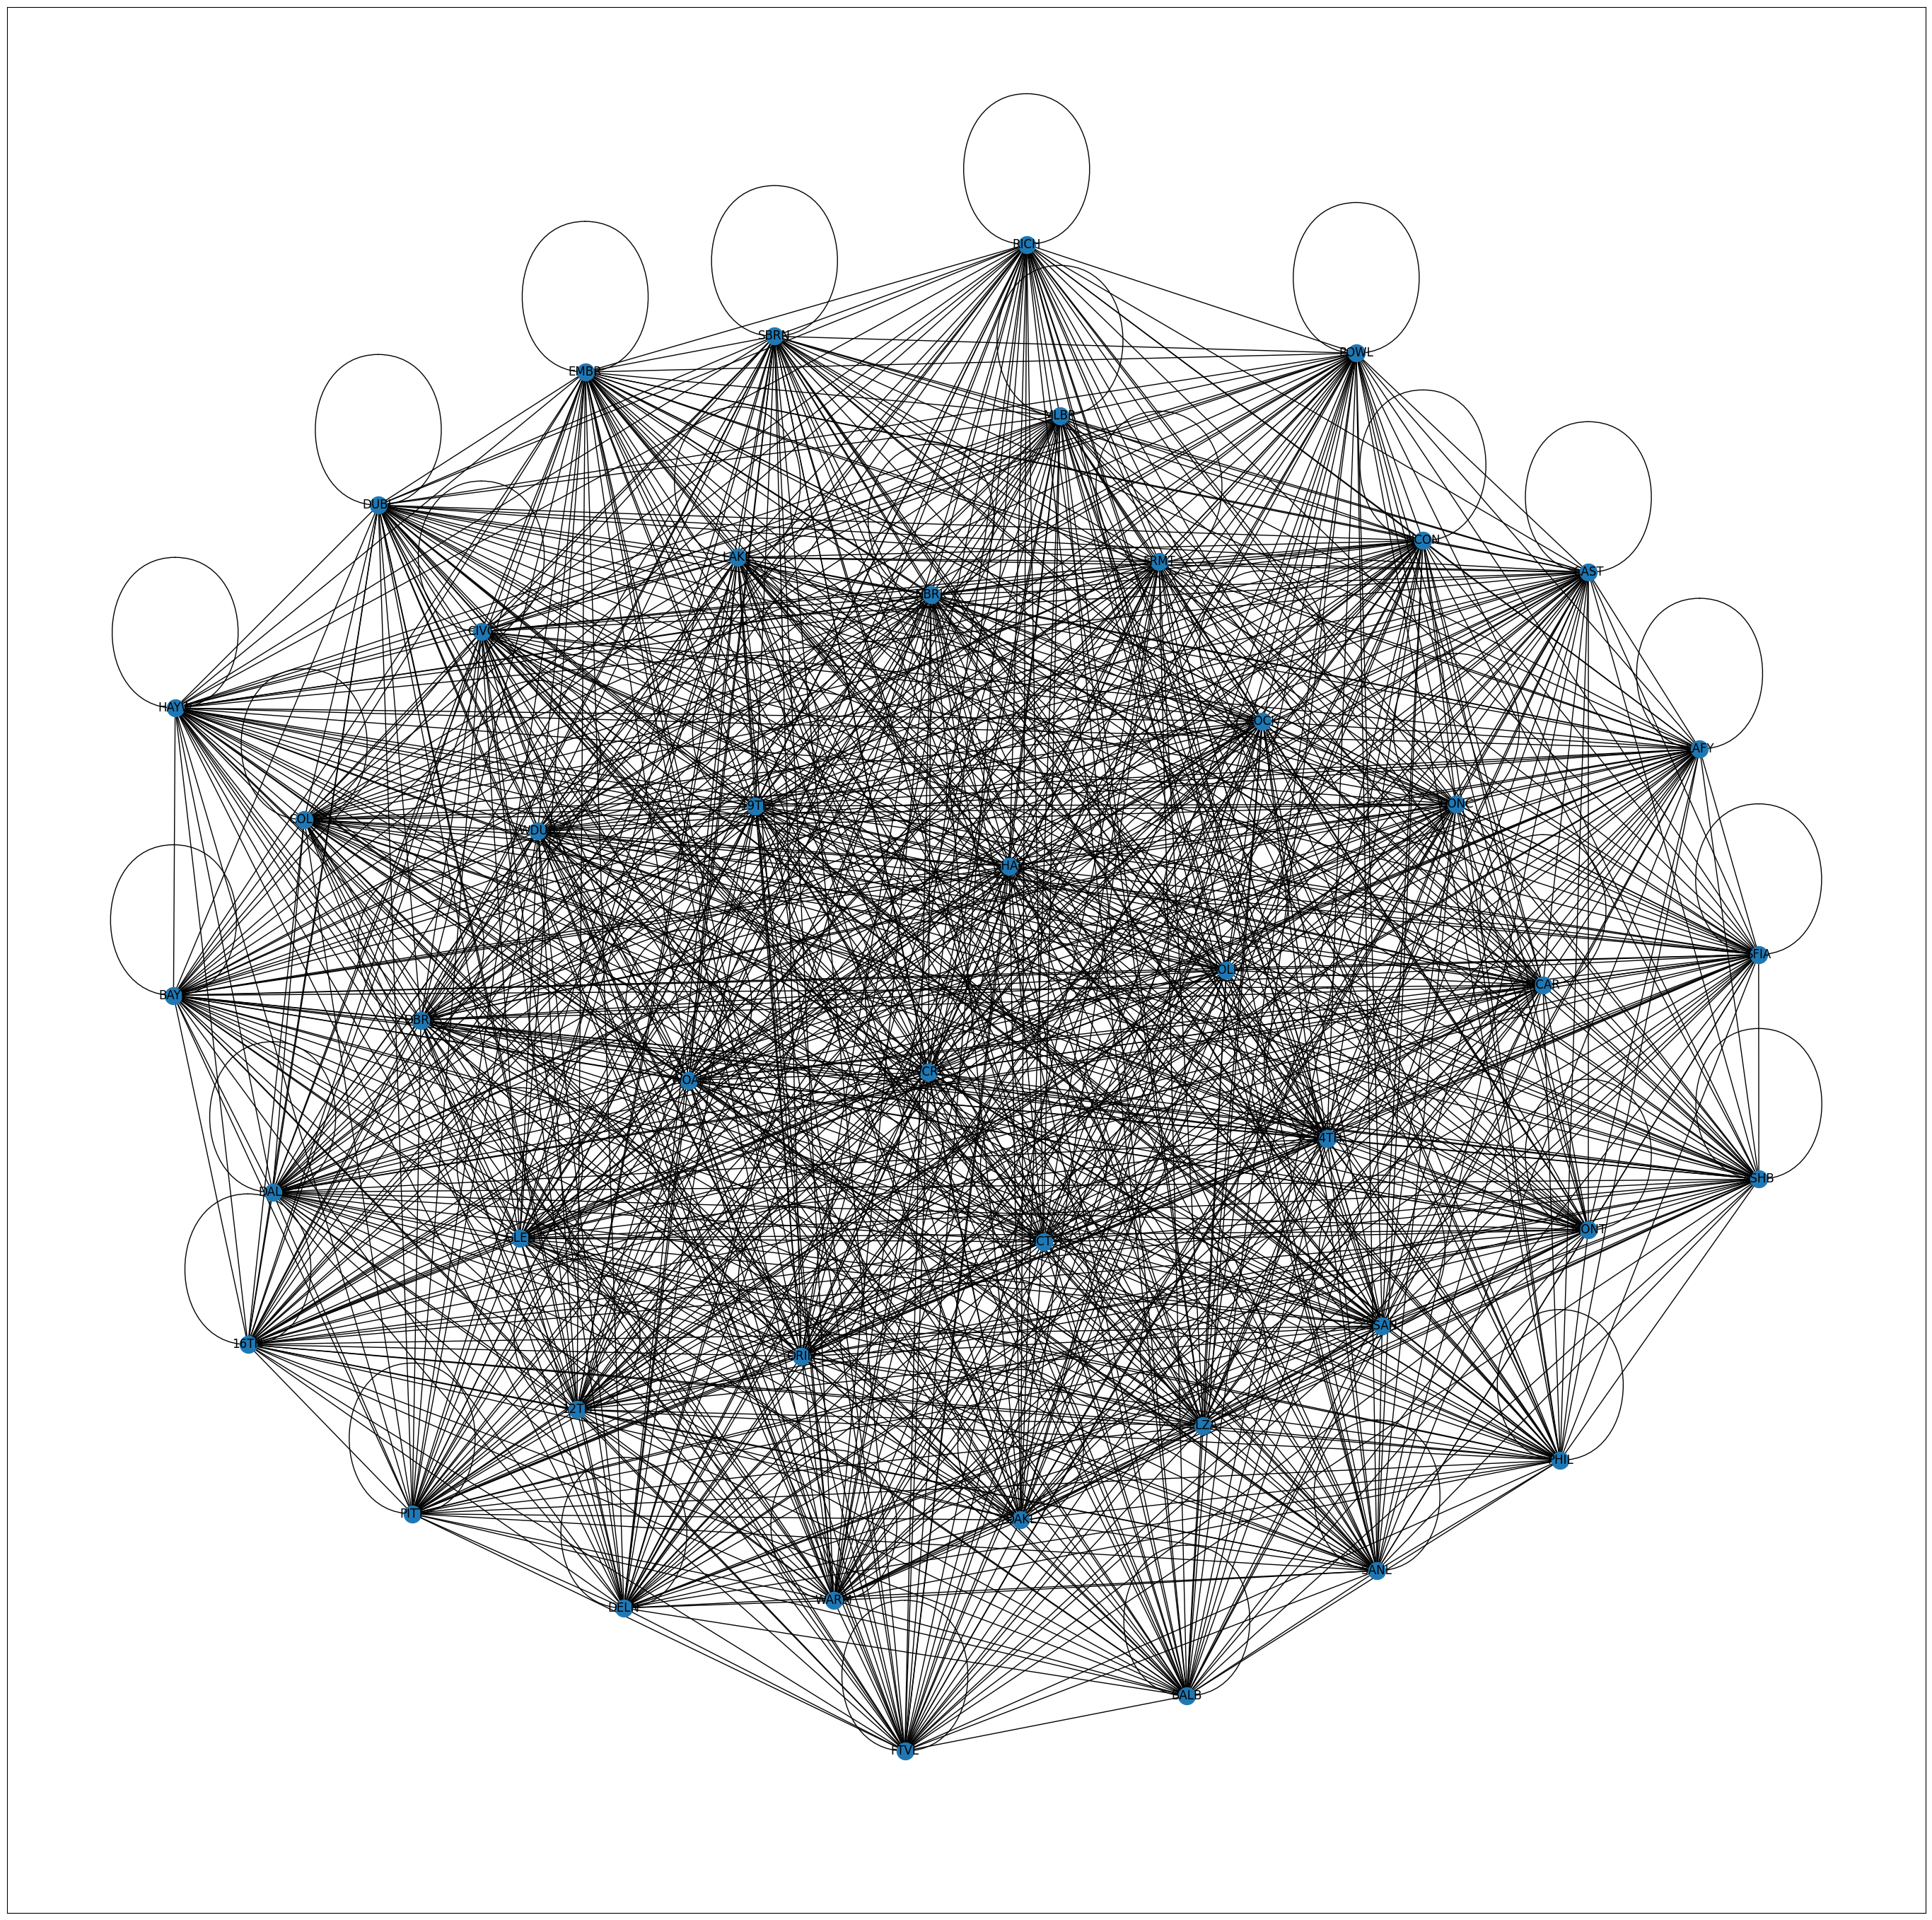

In [ ]:
plt.figure(figsize=(35,35))
nx.draw_networkx(df_distance_table,with_labels=True)

In [ ]:
df=df.drop(["o_latitute","o_longitude","d_latitute","d_longitude"],axis=1)

In [ ]:
df.head()

Hour Origin Station Destination Station  Trip Count  Day  Month  Year  \
0     7           SHAY                NCON           1    2      4  2016   
1    18           SHAY                NCON           1    1      9  2017   
2    11           SHAY                NCON           1    3      8  2017   
3    15           SHAY                NCON           1    5      7  2016   
4    18           SHAY                NCON           1    3     11  2016   

     WeekDay Month_Name    distance  
0  Wednesday      April  2856.23251  
1    Tuesday  September  2856.23251  
2   Thursday     August  2856.23251  
3   Saturday       July  2856.23251  
4   Thursday   November  2856.23251

In [ ]:
df.describe()

Hour    Trip Count           Day         Month          Year  \
count  1.994776e+06  1.994776e+06  1.994776e+06  1.994776e+06  1.994776e+06   
mean   1.363891e+01  1.257910e+01  2.845135e+00  6.522770e+00  2.016500e+03   
std    5.670005e+00  3.312378e+01  1.929001e+00  3.431691e+00  5.001965e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00  2.016000e+03   
25%    9.000000e+00  2.000000e+00  1.000000e+00  4.000000e+00  2.016000e+03   
50%    1.400000e+01  4.000000e+00  3.000000e+00  7.000000e+00  2.016000e+03   
75%    1.800000e+01  1.000000e+01  4.000000e+00  1.000000e+01  2.017000e+03   
max    2.300000e+01  1.126000e+03  6.000000e+00  1.200000e+01  2.018000e+03   

           distance  
count  1.994776e+06  
mean   9.747942e+03  
std    4.917372e+03  
min    0.000000e+00  
25%    6.019869e+03  
50%    9.603867e+03  
75%    1.395644e+04  
max    1.965544e+04

In [ ]:
df.corr(numeric_only=True)

Hour  Trip Count       Day     Month      Year  distance
Hour        1.000000   -0.006335  0.049057 -0.000981  0.000608  0.003017
Trip Count -0.006335    1.000000 -0.070221 -0.004984 -0.008544 -0.021820
Day         0.049057   -0.070221  1.000000  0.005317 -0.000399 -0.001823
Month      -0.000981   -0.004984  0.005317  1.000000  0.006728  0.000836
Year        0.000608   -0.008544 -0.000399  0.006728  1.000000  0.002343
distance    0.003017   -0.021820 -0.001823  0.000836  0.002343  1.000000

<Axes: >

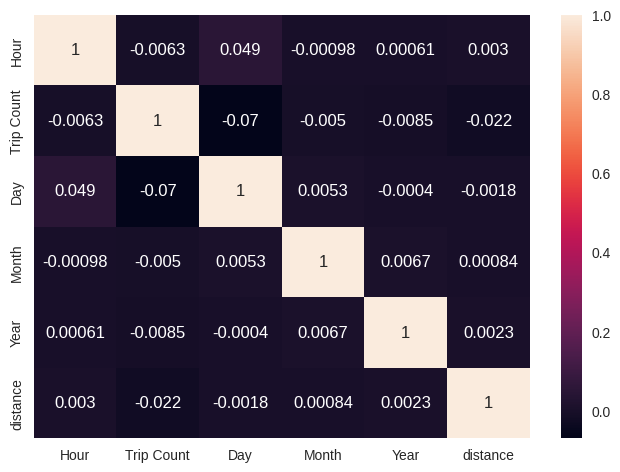

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

# What is the least popular BART route?

In [ ]:
count_df = df.groupby(['Origin Station', 'Destination Station']).size().reset_index(name='Count')

# En az tercih edilen seferi bulma
least_preferred = count_df[count_df['Count'] == count_df['Count'].min()]

print(least_preferred) # en az tercih edilen(popüler olmayan) rota

     Origin Station Destination Station  Count
1146           MLBR                WARM     22


## Which BART station is the busiest?

In [ ]:
# Her istasyonun kullanımını sayma
origin_counts = df['Origin Station'].value_counts()
destination_counts = df['Destination Station'].value_counts()

# İki sayımı birleştirme
station_counts = origin_counts.add(destination_counts, fill_value=0)

# En yoğun istasyonu bulma
most_frequent_station = station_counts.idxmax()
most_frequent_count = station_counts.max()


print(f"En yoğun istasyon: {most_frequent_station}")
print(f"Kullanım sayısı: {most_frequent_count}")

En yoğun istasyon: POWL
Kullanım sayısı: 126179


Text(0.5, 1.0, 'Station intensity according to hours')

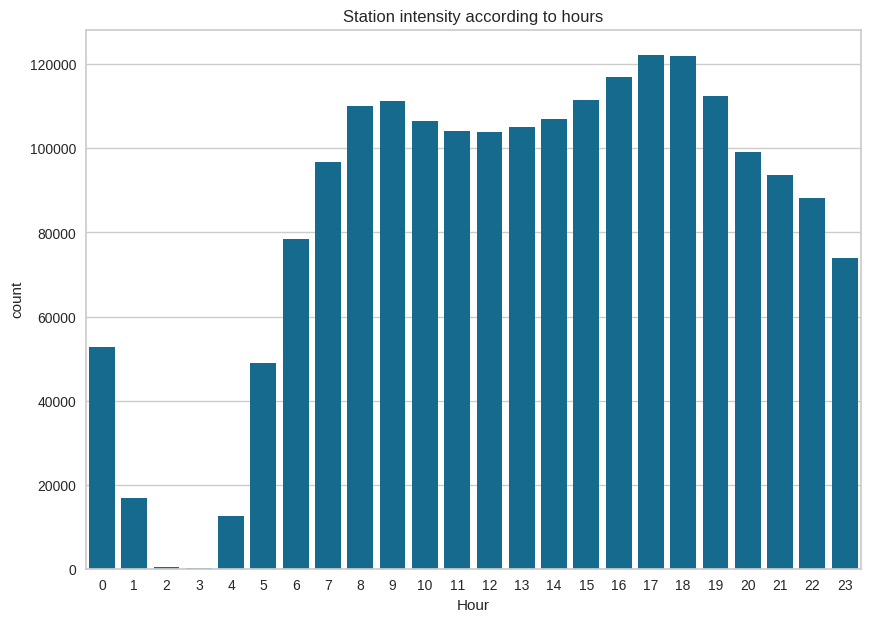

In [ ]:
# En çok 17 ve 18 saatlerinde yoğunluk oluşmaktadır. En sakin saatler 2-
plt.figure(figsize=(10,7))
sns.countplot(x=df['Hour'])
plt.title( 'Station intensity according to hours')

## When is the best time to go to SF from Berkeley if you want to find a seat?

POWL (Powell St.): 63702
EMBR (Embarcadero): 62163
CIVC (Civic Center): 62136
MONT (Montgomery St.): 61665
16TH (16th St. Mission): 56752
24TH (24th St. Mission): 55051
SFIA (San Francisco International Airport): 53668
Berkeley Stations
DBRK (Downtown Berkeley): 55717
19TH (19th St. Oakland): 54823 (Note: This is actually in Oakland, not Berkeley)
ASHB (Ashby): 43518

hepsi sf ve berkeley istasyonuymuş. bu yüzden en yoğun olan ikisini kullanarak cevap vereceğim.

In [ ]:
df['Origin Station'].value_counts()

Origin Station
POWL    63702
EMBR    62163
CIVC    62136
MONT    61665
16TH    56752
DBRK    55717
12TH    55115
24TH    55051
19TH    54823
SFIA    53668
MCAR    52886
FTVL    50585
DALY    49685
COLS    49417
BALB    48357
DELN    47821
LAKE    46686
FRMT    45541
GLEN    45431
SANL    44980
PITT    43853
ASHB    43518
CONC    43210
WCRK    42909
BAYF    42870
HAYW    42771
WOAK    41987
RICH    41565
DUBL    41089
ROCK    40414
NBRK    39425
PLZA    38648
PHIL    38570
MLBR    38485
UCTY    36485
SBRN    34806
SHAY    33770
OAKL    33166
COLM    31474
WDUB    30841
SSAN    30730
LAFY    29459
CAST    29077
ORIN    26962
NCON    25166
WARM    11345
Name: count, dtype: int64

In [ ]:
filtered_df = df[(df['Origin Station'] == 'DBRK') & (df['Destination Station'] == 'POWL')]

In [ ]:
filtered_df

Hour Origin Station Destination Station  Trip Count  Day  Month  \
1011709    19           DBRK                POWL          29    0      6   
1011710     1           DBRK                POWL           1    2     11   
1011711     9           DBRK                POWL          63    2      1   
1011712    10           DBRK                POWL          58    3     12   
1011713    21           DBRK                POWL          19    4      6   
...       ...            ...                 ...         ...  ...    ...   
1013185    12           DBRK                POWL          47    3      9   
1013186     1           DBRK                POWL           2    5      5   
1013187    21           DBRK                POWL          29    2      3   
1013188     9           DBRK                POWL          45    5      5   
1013189    23           DBRK                POWL           8    2      6   

         Year    WeekDay Month_Name     distance  
1011709  2016     Monday       June  8562.659131  
1011710  2017  Wednesday   November  8562.659131  
1011711  2017  Wednesday    January  8562.659131  
1011712  2016   Thursday   December  8562.659131  
1011713  2017     Friday       June  8562.659131  
...       ...        ...        ...          ...  
1013185  2016   Thursday  September  8562.659131  
1013186  2016   Saturday        May  8562.659131  
1013187  2017  Wednesday      March  8562.659131  
1013188  2016   Saturday        May  8562.659131  
1013189  2017  Wednesday       June  8562.659131  

[1481 rows x 10 columns]

Text(0.5, 1.0, 'Station intensity according to hours(berkeley to sf)')

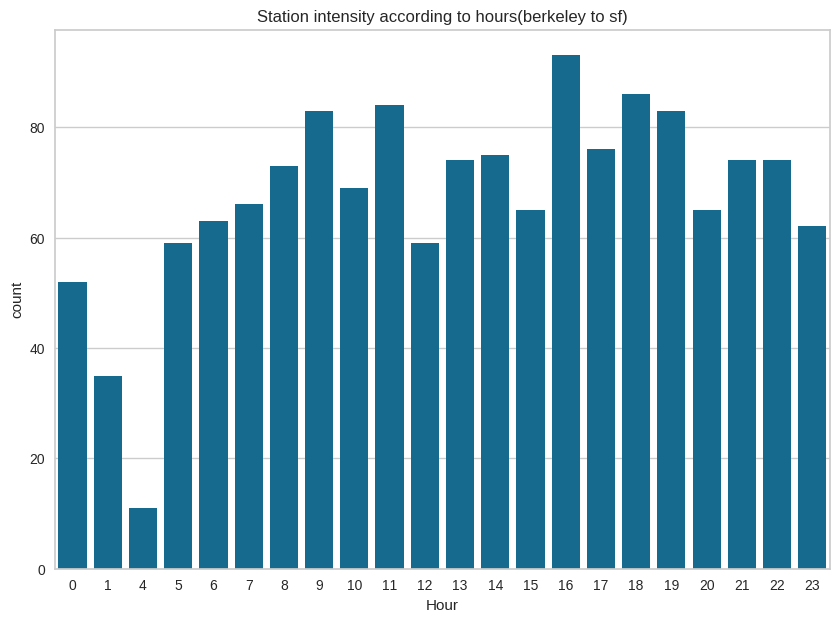

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=filtered_df['Hour'])
plt.title( 'Station intensity according to hours(berkeley to sf)')

saat 4-1-0-12 ve 23 koltukta seyahat etmek için en iyi saatler...

## Which day of the week is the busiest?

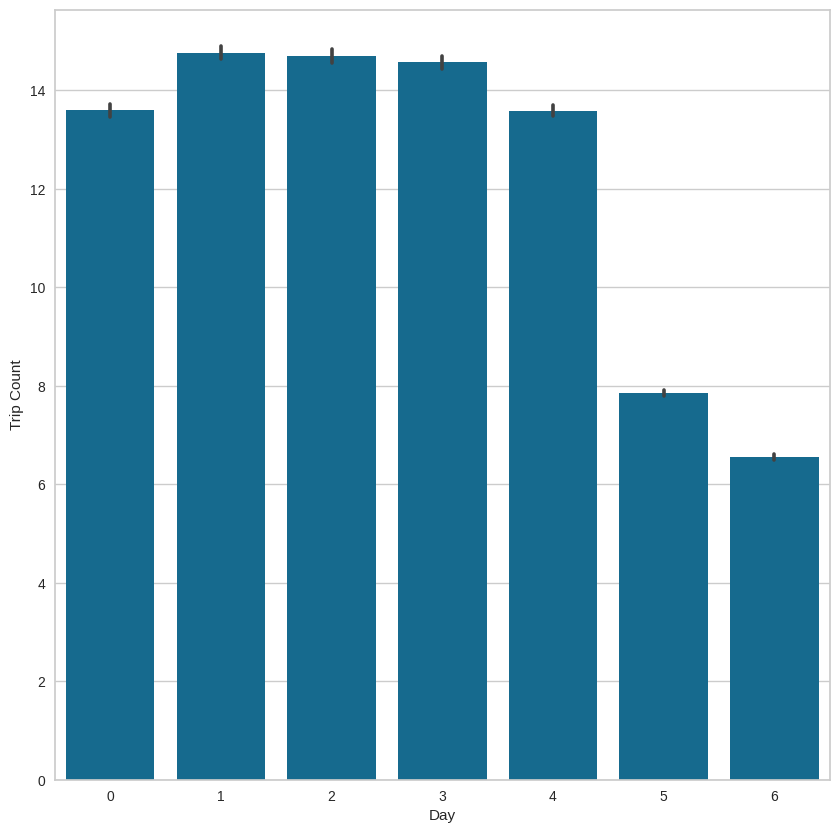

In [ ]:
plt.figure(figsize=(10, 10))
bar_plot = sns.barplot(x='Day', y='Trip Count', data=df)

en yoğun salı günleri

# How many people take the BART late at night?


In [ ]:
df['Hour'].value_counts()

Hour
17    122116
18    121904
16    117031
19    112428
15    111587
9     111227
8     110060
14    106888
10    106516
13    105097
11    104193
12    103873
20     99100
7      96861
21     93671
22     88156
6      78480
23     73997
0      52859
5      48850
1      16770
4      12552
2        359
3        201
Name: count, dtype: int64

In [ ]:
df.head()

Hour Origin Station Destination Station  Trip Count  Day  Month  Year  \
0     7           SHAY                NCON           1    2      4  2016   
1    18           SHAY                NCON           1    1      9  2017   
2    11           SHAY                NCON           1    3      8  2017   
3    15           SHAY                NCON           1    5      7  2016   
4    18           SHAY                NCON           1    3     11  2016   

     WeekDay Month_Name    distance  
0  Wednesday      April  2856.23251  
1    Tuesday  September  2856.23251  
2   Thursday     August  2856.23251  
3   Saturday       July  2856.23251  
4   Thursday   November  2856.23251

In [ ]:
late_night_passengers = df[(df['Hour'] >= 22) &
                            (df['Hour'] <= 23)]

# Toplam yolcu sayısını hesaplama
#total_passengers = late_night_passengers['Passenger Count'].sum()

In [ ]:
late_night_passengers

Hour Origin Station Destination Station  Trip Count  Day  Month  \
37         23           SHAY                NCON           1    1     11   
38         22           SHAY                NCON           1    6      4   
59         23           SHAY                NCON           1    2      8   
73         22           SHAY                NCON           1    4      3   
106        22           SHAY                NCON           1    4     10   
...       ...            ...                 ...         ...  ...    ...   
1994613    23           NCON                LAFY          13    0      7   
1994688    22           NCON                LAFY           1    6      3   
1994711    22           NCON                LAFY           1    2      4   
1994739    22           NCON                LAFY           1    5     12   
1994756    22           NCON                LAFY           1    3     11   

         Year    WeekDay Month_Name     distance  
37       2016    Tuesday   November  2856.232510  
38       2016     Sunday      April  2856.232510  
59       2016  Wednesday     August  2856.232510  
73       2016     Friday      March  2856.232510  
106      2017     Friday    October  2856.232510  
...       ...        ...        ...          ...  
1994613  2016     Monday       July  5265.945625  
1994688  2017     Sunday      March  5265.945625  
1994711  2017  Wednesday      April  5265.945625  
1994739  2017   Saturday   December  5265.945625  
1994756  2017   Thursday   November  5265.945625  

[162153 rows x 10 columns]

162153 yolcu kullanmış fakat veri çok büyük olduğu için yüzde 10 a düşürmüştüm veriyi.

In [ ]:
df

Hour Origin Station Destination Station  Trip Count  Day  Month  \
0           7           SHAY                NCON           1    2      4   
1          18           SHAY                NCON           1    1      9   
2          11           SHAY                NCON           1    3      8   
3          15           SHAY                NCON           1    5      7   
4          18           SHAY                NCON           1    3     11   
...       ...            ...                 ...         ...  ...    ...   
1994771     9           NCON                LAFY           1    4      4   
1994772    11           NCON                LAFY           4    5      9   
1994773    18           NCON                LAFY           1    1      7   
1994774    10           NCON                LAFY           2    1      3   
1994775    10           NCON                LAFY           3    0      7   

         Year    WeekDay Month_Name     distance  
0        2016  Wednesday      April  2856.232510  
1        2017    Tuesday  September  2856.232510  
2        2017   Thursday     August  2856.232510  
3        2016   Saturday       July  2856.232510  
4        2016   Thursday   November  2856.232510  
...       ...        ...        ...          ...  
1994771  2016     Friday      April  5265.945625  
1994772  2016   Saturday  September  5265.945625  
1994773  2017    Tuesday       July  5265.945625  
1994774  2016    Tuesday      March  5265.945625  
1994775  2016     Monday       July  5265.945625  

[1994776 rows x 10 columns]

In [ ]:
df.drop(columns=["WeekDay",'Month_Name'],inplace=True)

In [ ]:
df_reg=df

In [ ]:
x,y=df_reg.drop("Trip Count",axis=1),df_reg[["Trip Count"]]

In [ ]:
x=pd.get_dummies(x)

In [ ]:
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Gr=GradientBoostingRegressor()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluşturma ve daha az ağaç ile eğitim
model = RandomForestClassifier(n_estimators=50, max_depth=10)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [ ]:
tahmin=model.predict(x_test)

In [ ]:
r2_score(tahmin,y_test)

-115583.97236866623

In [ ]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor

    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()

    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae


    return result.sort_values('R_Squared',ascending=False)

In [ ]:
regression_funct(x,y)

R_Squared       RMSE        MAE
ExtraTreeRegressor          0.756966  16.075894   5.326265
KNeighborsRegressor         0.560445  21.619628   7.840059
GradientBoostingRegressor   0.456811  24.033521   9.654786
LinearRegression            0.164505  29.806690  12.141434
Ridge                       0.164504  29.806702  12.140706
ElasticNet                  0.010341  32.440287  14.122599
Lasso                       0.005540  32.518870  14.185415

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()



        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']

        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)


        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))



        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [ ]:
algo_test(x,y)

R_Squared          RMSE           MAE
XGBRegressor         8.009086e-01  1.455017e+01  6.101442e+00
Decision Tree        7.758642e-01  1.543823e+01  5.215711e+00
Extra Tree           7.524690e-01  1.622395e+01  5.347930e+00
AdaBoost             5.604455e-01  2.161963e+01  7.840059e+00
Gradient Boosting    4.568108e-01  2.403352e+01  9.654786e+00
mlp_regressor        1.664677e-01  2.977166e+01  1.411068e+01
Linear               1.645051e-01  2.980669e+01  1.214143e+01
Ridge                1.645044e-01  2.980670e+01  1.214071e+01
ElasticNet           1.034076e-02  3.244029e+01  1.412260e+01
Lasso                5.540228e-03  3.251887e+01  1.418541e+01
SVR                 -7.403716e-02  3.379493e+01  1.074087e+01
KNeighborsRegressor -6.682411e-01  4.211834e+01  3.564166e+01
SGD                 -2.283676e+27  1.558329e+15  1.555776e+15

Veriyi yüzde 1 e dürüp öyle denedik ve yukardaki sonucu aldık.